<a href="https://colab.research.google.com/github/AndroBuddy/cricket-data-set/blob/master/Score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AndroBuddy/cricket-data-set.git

fatal: destination path 'cricket-data-set' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd
import glob

path = r'/content/cricket-data-set' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    matches = pd.read_csv(filename, index_col=None, header=0)
    matches["total_runs"] = matches.runs_off_bat + matches.extras
    column = pd.unique(matches["batting_team"])
    df = matches.groupby(matches["batting_team"])
    try:
      df1 = df.get_group(column[0])
      df2 = df.get_group(column[1])

      df1["cumulative"] = df1["total_runs"].cumsum()
      df2["cumulative"] = df2["total_runs"].cumsum()

      matches = pd.concat([df1,df2])
      li.append(matches)
    except:
      print(filename)
      print("HELOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO") ## one of the files : 501265 has some error
      continue

matches = pd.concat(li, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/content/cricket-data-set/501265.csv
HELOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


In [ ]:
matches_copy = matches.copy()

In [ ]:
matches.season.iloc[0]

2012

In [ ]:
matches  = matches.drop(columns = ["season" , "match_id" , "start_date" , "wicket_type" , "player_dismissed" , "other_wicket_type" , "other_player_dismissed"])

In [ ]:
matches  = matches.drop(columns = ["runs_off_bat" , "extras" , "wides" , "noballs" , "byes" , "legbyes" , "penalty"])

In [ ]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [ ]:
pd.unique(matches["venue"])

array(['MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'M Chinnaswamy Stadium', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'New Wanderers Stadium',
       'Brabourne Stadium', 'Subrata Roy Sahara Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Kingsmead',
       'SuperSport Park', 'Himachal Pradesh Cricket Association Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Feroz Shah Kotla',
       'Newlands', 'Wankhede Stadium', 'De Beers Diamond Oval',
       'Barabati Stadium', 'Nehru Stadium', 'Buffalo Park',
       'Sardar Patel Stadium, Motera', 'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha', "St George's Park",
       'OUTsurance Oval'], dtype=object)

In [ ]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
matches = matches[(matches['batting_team'].isin(current_teams)) & (matches['bowling_team'].isin(current_teams))]

In [ ]:
pd.unique(matches["batting_team"])

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Kings XI Punjab'], dtype=object)

In [ ]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [ ]:
venue_encoder = LabelEncoder()
matches["venue"] = venue_encoder.fit_transform(matches["venue"])
batting_team_encoder = LabelEncoder()
matches["batting_team"] = batting_team_encoder.fit_transform(matches["batting_team"])
bowling_team_encoder = LabelEncoder()
matches["bowling_team"] = bowling_team_encoder.fit_transform(matches["bowling_team"])
striker_encoder = LabelEncoder()
matches["striker"] = striker_encoder.fit_transform(matches["striker"])
non_striker_encoder = LabelEncoder()
matches["non_striker"] = non_striker_encoder.fit_transform(matches["non_striker"])
bowler_encoder = LabelEncoder()
matches["bowler"] = bowler_encoder.fit_transform(matches["bowler"])

In [ ]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [ ]:
matches_copy['count'] = 1
matches_copy.groupby(['venue']).count()['count']

venue
Barabati Stadium                                        973
Brabourne Stadium                                      1720
Buffalo Park                                            715
De Beers Diamond Oval                                   726
Dr DY Patil Sports Academy                             3993
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     476
Eden Gardens                                           6451
Feroz Shah Kotla                                       6160
Himachal Pradesh Cricket Association Stadium           1673
Holkar Cricket Stadium                                  408
Kingsmead                                              3643
M Chinnaswamy Stadium                                  6398
MA Chidambaram Stadium, Chepauk                        8050
Nehru Stadium                                          1155
New Wanderers Stadium                                  1940
Newlands                                               1539
OUTsurance Oval                   

In [ ]:
matches.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'total_runs', 'cumulative'],
      dtype='object')

In [ ]:
matches = matches[matches["ball"] < 6]

In [ ]:
##Standardisation
matches["venue"] = matches["venue"] / max(matches["venue"])
# matches["ball"] = matches["ball"] / 6
matches["batting_team"] = matches_copy["batting_team"] / max(matches["batting_team"])
matches["bowling_team"] = matches["bowling_team"] / max(matches["bowling_team"])
matches["striker"] = matches["striker"] / max(matches["striker"])
matches["non_striker"] = matches["non_striker"] / max(matches["non_striker"])
# matches["cumulative"] = matches["cumulative"] / max(matches["cumulative"])

In [ ]:
matches_copy[matches_copy["ball"] == 5.5]["cumulative"]

34       47
161      56
282      46
406      42
523      31
         ..
74564    54
74661    37
74789    64
74913    37
75040    61
Name: cumulative, Length: 630, dtype: int64

In [ ]:
# matches[matches_copy["ball"] == 5.5]["cumulative"]*246

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


34       11562
161      13776
282      11316
406      10332
523       7626
         ...  
73864    12300
73988     9348
74111     7872
74661     9102
74789    15744
Name: cumulative, Length: 408, dtype: int64

In [ ]:
# features = ["venue" , "innings" , "ball" , "batting_team" , "bowling_team" , "striker" , "non_striker" , "bowler" , "total_runs" , "cumulative"]
features = ["venue" , "innings" , "ball" , "batting_team" , "bowling_team"]

# features = [ "innings" , "ball" , "total_runs"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(matches[features] , matches["cumulative"], test_size=0.2, random_state=0)

In [ ]:
#__Random forest regressor__
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

print(rf_random.best_params_)
prediction = rf_random.predict(x_test)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.2min finished


{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [ ]:
##XGBoost

from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(x_train , y_train)
xgb_prediction = xgb.predict(x_test)

[18:55:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 33.4min finished


{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
MAE: 4.617372771945046
MSE: 41.54498107068064
RMSE: 6.445539626026718


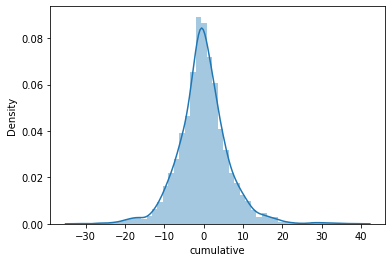

In [ ]:
from sklearn import metrics

print(sns.distplot(y_test-prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
MAE: 10.1671953372253
MSE: 208.86815063865637
RMSE: 14.452271469864396


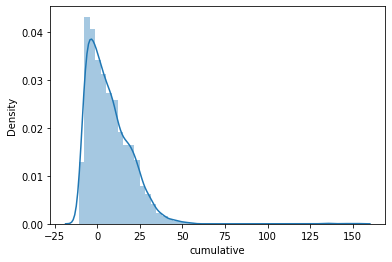

In [ ]:
print(sns.distplot(y_test-xgb_prediction))
print('MAE:', metrics.mean_absolute_error(y_test, xgb_prediction))
print('MSE:', metrics.mean_squared_error(y_test, xgb_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction)))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test , prediction))
print(r2_score(y_test , xgb_prediction))

0.8403865404993888
0.19754041899279262


In [ ]:
import joblib

In [ ]:
joblib.dump(rf_random , "FewFeaturesRandomForest_BetterThanThePrevious.joblib")
# joblib.dump(venue_encoder , "venue_encoder.joblib")
# joblib.dump(batting_team_encoder , "batting_team_encoder.joblib")
# joblib.dump(bowling_team_encoder , "bowling_team_encoder.joblib")
# joblib.dump(striker_encoder , "striker_encoder .joblib")
# joblib.dump(bowler_encoder , "bowler_encoder.joblib")
# joblib.dump(non_striker_encoder , "non_striker_encoder .joblib")

['FewFeaturesRandomForest_BetterThanThePrevious.joblib']

In [ ]:
prediction = rf_random.predict(x_test)

In [ ]:
x_test1 = x_test.reset_index(drop = True , inplace = True)

In [ ]:
x_test

,venue,innings,ball,batting_team,bowling_team
64849,3,2,0.3,1,4
7417,5,1,1.6,1,4
63422,4,2,0.5,3,5
50820,11,1,5.1,6,5
4783,8,1,4.5,5,6
...,...,...,...,...,...
28170,9,1,3.8,0,1
25483,15,1,5.2,6,5
54383,15,1,2.4,4,5
50795,11,1,0.6,6,5


In [ ]:
data = np.array([9, 2 , 5.5 , 5, 4])
rf_random.predict(data.reshape(1 , -1))

array([41.08860218])

In [ ]:
matches[matches["ball"] == 5.5]

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,total_runs,cumulative
34,9,1,5.5,0,3,136,140,35,1,47
161,9,2,5.5,3,0,149,102,126,2,56
282,9,1,5.5,5,0,179,235,126,4,46
406,9,2,5.5,0,5,224,140,73,0,42
523,15,1,5.5,5,4,239,235,59,0,31
...,...,...,...,...,...,...,...,...,...,...
73864,8,2,5.5,4,0,186,72,126,1,50
73988,13,1,5.5,2,4,222,18,109,2,38
74111,13,2,5.5,4,2,34,8,137,0,32
74661,19,1,5.5,2,4,222,125,195,0,37


In [ ]:
# mid,       date,       venue,       bat_team,       bowl_team,      batsman,          bowler,         runs,     wickets,          overs,        runs_last_5,           wickets_last_5,            striker,             non-striker,               total

In [ ]:
# 1,       2008-04-18,   M Chin ,    Kolkata Kni,   Royal Challen B,   SC Ganguly,      P Kumar,                        1,         0,               0.1,              1,                      0,                      0,                     0,                         222